# Housing Prices Prediction Assignment

Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. Requireemnt is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Step 1: Reading and Understanding the Data
Let us import the requisite libraries and read the data

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [191]:
housing = pd.read_csv("housing_data.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Inspect the various aspects of the data

In [192]:
housing.shape

(1460, 81)

In [193]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Dropping Features
Above tells us that there are four features Alley, PoolQC, Fence, MiscFeatureno which mostly have NULL in the dataset. Hence, we will drop these features. 
As we have 81 features available in data, we will drop features which are explaining the other features in more detail e.g. Condition1 & Condition2. 
Also, We will drop features which does not seem to have great bearing on the price of home.

Id, Alley

LandSlope (Mostly has 'Gtl' as value)

Utilities (Mostly has 'AllPub' as value)

Heating (Allmost all houses have 'GasA')

Electrical (Most has 'SBrkr')


Condition1 (Proximity to various conditions)

Condition2, YearRemodAdd, Exterior2nd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, Fireplaces, FireplaceQu, GarageYrBlt, GarageFinish, GarageArea, GarageQual, GarageCond, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal

In [194]:
insignificant_features = ['Id', 'Alley', 'LandSlope', 'Utilities', 'Heating', 'Electrical', 'Condition1', 'Condition2', 'YearRemodAdd', 'Exterior2nd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'BsmtQual', 'BsmtExposure', 'BsmtFinType2']

housing.drop(insignificant_features, axis = 1, inplace = True) 

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  RoofMatl       1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  MasVnrType     1452 non-null   object 
 18  ExterQua

#### NULL Treatment

NULL treatment for categorical variable will be done by replacing with most common value.

In [195]:
housing['GarageType'].value_counts(dropna = False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [196]:
housing['GarageType'].fillna('Attchd', inplace = True)

In [197]:
housing['MasVnrType'].value_counts(dropna = False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [198]:
housing['MasVnrType'].fillna('None', inplace = True)

In [199]:
housing['BsmtCond'].value_counts(dropna = False)

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [200]:
housing['BsmtCond'].fillna('TA', inplace = True)

In [201]:
housing['BsmtFinType1'].value_counts(dropna = False)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

In [202]:
housing['BsmtFinType1'].fillna('Unf', inplace = True)

In [203]:
housing['LotFrontage'].mean()

70.04995836802665

In [204]:
housing['LotFrontage'].fillna(70, inplace = True)

LoTfrontage is showing as float variable in dataframe while all values are integer only. Let us convert it to int64.

In [205]:
housing['LotFrontage'].astype('int64')

0       65
1       80
2       68
3       60
4       84
        ..
1455    62
1456    85
1457    66
1458    68
1459    75
Name: LotFrontage, Length: 1460, dtype: int64

In [206]:
housing['SalePrice_Thousands'] = housing.SalePrice // 1000
housing.drop(['SalePrice'], axis = 1, inplace = True)

In [207]:
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,MoSold,YrSold,SalePrice_Thousands
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.041096,10516.828082,6.099315,5.575342,1971.267808,1057.429452,1162.626712,346.992466,5.844521,...,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,1.767123,6.321918,2007.815753,180.695205
std,42.300571,22.024031,9981.264932,1.382997,1.112799,30.202904,438.705324,386.587738,436.528436,48.623081,...,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.747315,2.703626,1.328095,79.442279
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2006.000000,34.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,795.750000,882.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,1.000000,5.000000,2007.000000,129.750000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,991.500000,1087.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,2008.000000,163.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,1298.250000,1391.250000,728.000000,0.000000,...,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,2.000000,8.000000,2009.000000,214.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,6110.000000,4692.000000,2065.000000,572.000000,...,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,4.000000,12.000000,2010.000000,755.000000


## Step 2: Visualising the Data

We'll visualise our data using matplotlib and seaborn. It will help us in understanding the data.

We will look for any obvious multicollinearity going on. We will also identify if some predictors directly have a strong association with the outcome variable.


<AxesSubplot:>

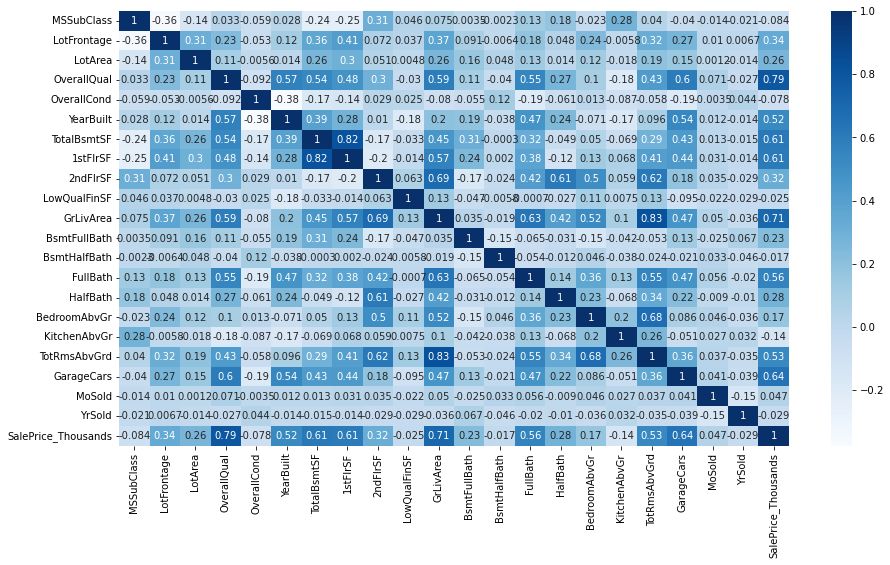

In [208]:
corr_matrix = housing.corr()
corr_matrix = corr_matrix.round(4)
plt.figure(figsize = (15,8))
sns.heatmap(corr_matrix, cmap = "Blues", annot = True)

#### From above correlation diagram, it seems their is high correlation between 1stFlrSF & TotalBsmtSF, GrLivArea & TotRmsAbvGrd which makes sense as they are related. So we will drop 1stFlrSF and GrLivArea.

Also, OverallQual seems to have highest correlation with SalePrice.

In [209]:
corr_feature = ['1stFlrSF', 'GrLivArea']
housing_df = housing.drop(corr_feature, axis = 1)

In [210]:
housing_df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,MoSold,YrSold,SalePrice_Thousands
MSSubClass,1.000000,-0.357042,-0.139781,0.032628,-0.059316,0.027850,-0.238518,0.307886,0.046474,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.040110,-0.013585,-0.021407,-0.084290
LotFrontage,-0.357042,1.000000,0.306689,0.234227,-0.052842,0.117555,0.363366,0.072479,0.036879,0.091428,-0.006446,0.180431,0.048209,0.237016,-0.005762,0.320166,0.269722,0.010172,0.006750,0.335063
LotArea,-0.139781,0.306689,1.000000,0.105806,-0.005636,0.014228,0.260833,0.050986,0.004779,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.154871,0.001205,-0.014261,0.263962
OverallQual,0.032628,0.234227,0.105806,1.000000,-0.091932,0.572323,0.537808,0.295493,-0.030429,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.600671,0.070815,-0.027347,0.791003
OverallCond,-0.059316,-0.052842,-0.005636,-0.091932,1.000000,-0.375983,-0.171098,0.028942,0.025494,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.185758,-0.003511,0.043950,-0.077926
YearBuilt,0.027850,0.117555,0.014228,0.572323,-0.375983,1.000000,0.391452,0.010308,-0.183784,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.537850,0.012398,-0.013618,0.522708
TotalBsmtSF,-0.238518,0.363366,0.260833,0.537808,-0.171098,0.391452,1.000000,-0.174512,-0.033245,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.434585,0.013196,-0.014969,0.613617
2ndFlrSF,0.307886,0.072479,0.050986,0.295493,0.028942,0.010308,-0.174512,1.000000,0.063353,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423,0.183926,0.035164,-0.028700,0.319532
LowQualFinSF,0.046474,0.036879,0.004779,-0.030429,0.025494,-0.183784,-0.033245,0.063353,1.000000,-0.047143,-0.005842,-0.000710,-0.027080,0.105607,0.007522,0.131185,-0.094480,-0.022174,-0.028921,-0.025527
BsmtFullBath,0.003491,0.091428,0.158155,0.111098,-0.054942,0.187599,0.307351,-0.169494,-0.047143,1.000000,-0.147871,-0.064512,-0.030905,-0.150673,-0.041503,-0.053275,0.131881,-0.025361,0.067049,0.227388


#### Visualising Numeric Variables.

Let's make a pairplot of all the numeric variables.

We are going to do it in two parts as the number of features are large for the better visibility of the graphs.

In [211]:
# Making list of important numerical variables otherwise plot with be drawn for all the variables having numerical values but are categorical.

num_var_list = ['LotFrontage', 'LotArea', 'YearBuilt', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF','BsmtFullBath', 'BsmtHalfBath',
                'SalePrice_Thousands']

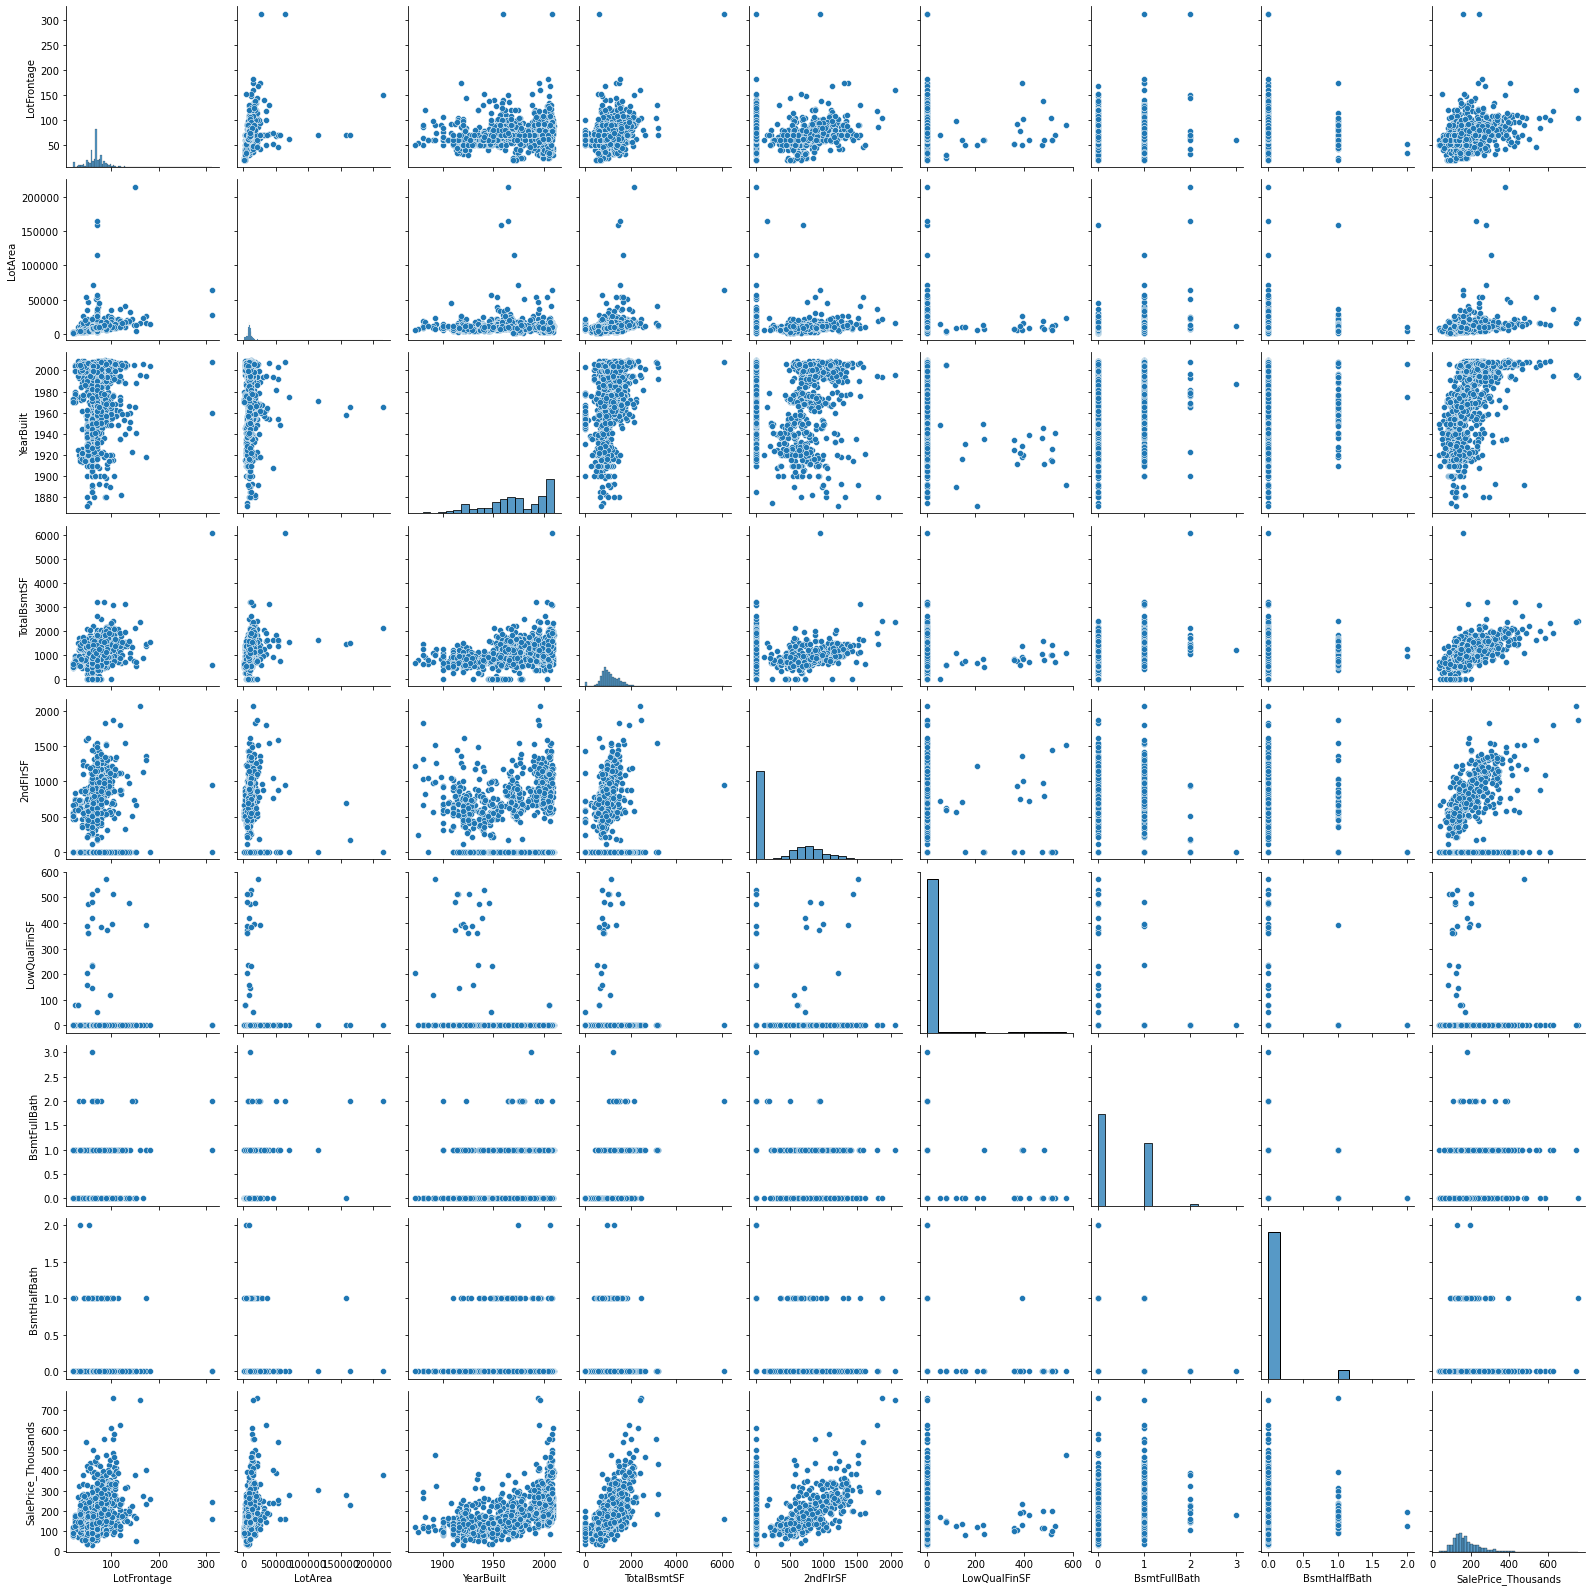

In [212]:
sns.pairplot(housing_df[num_var_list])
plt.show()

In [213]:
# Making list of important numerical variables otherwise plot with be drawn for all the variables having numerical values but are categorical.

num_var_list = ['OverallQual', 'OverallCond', 'FullBath' ,'HalfBath', 'BedroomAbvGr' , 'KitchenAbvGr' ,'TotRmsAbvGrd' ,'GarageCars' ,'MoSold' ,'YrSold' ,'SalePrice_Thousands']

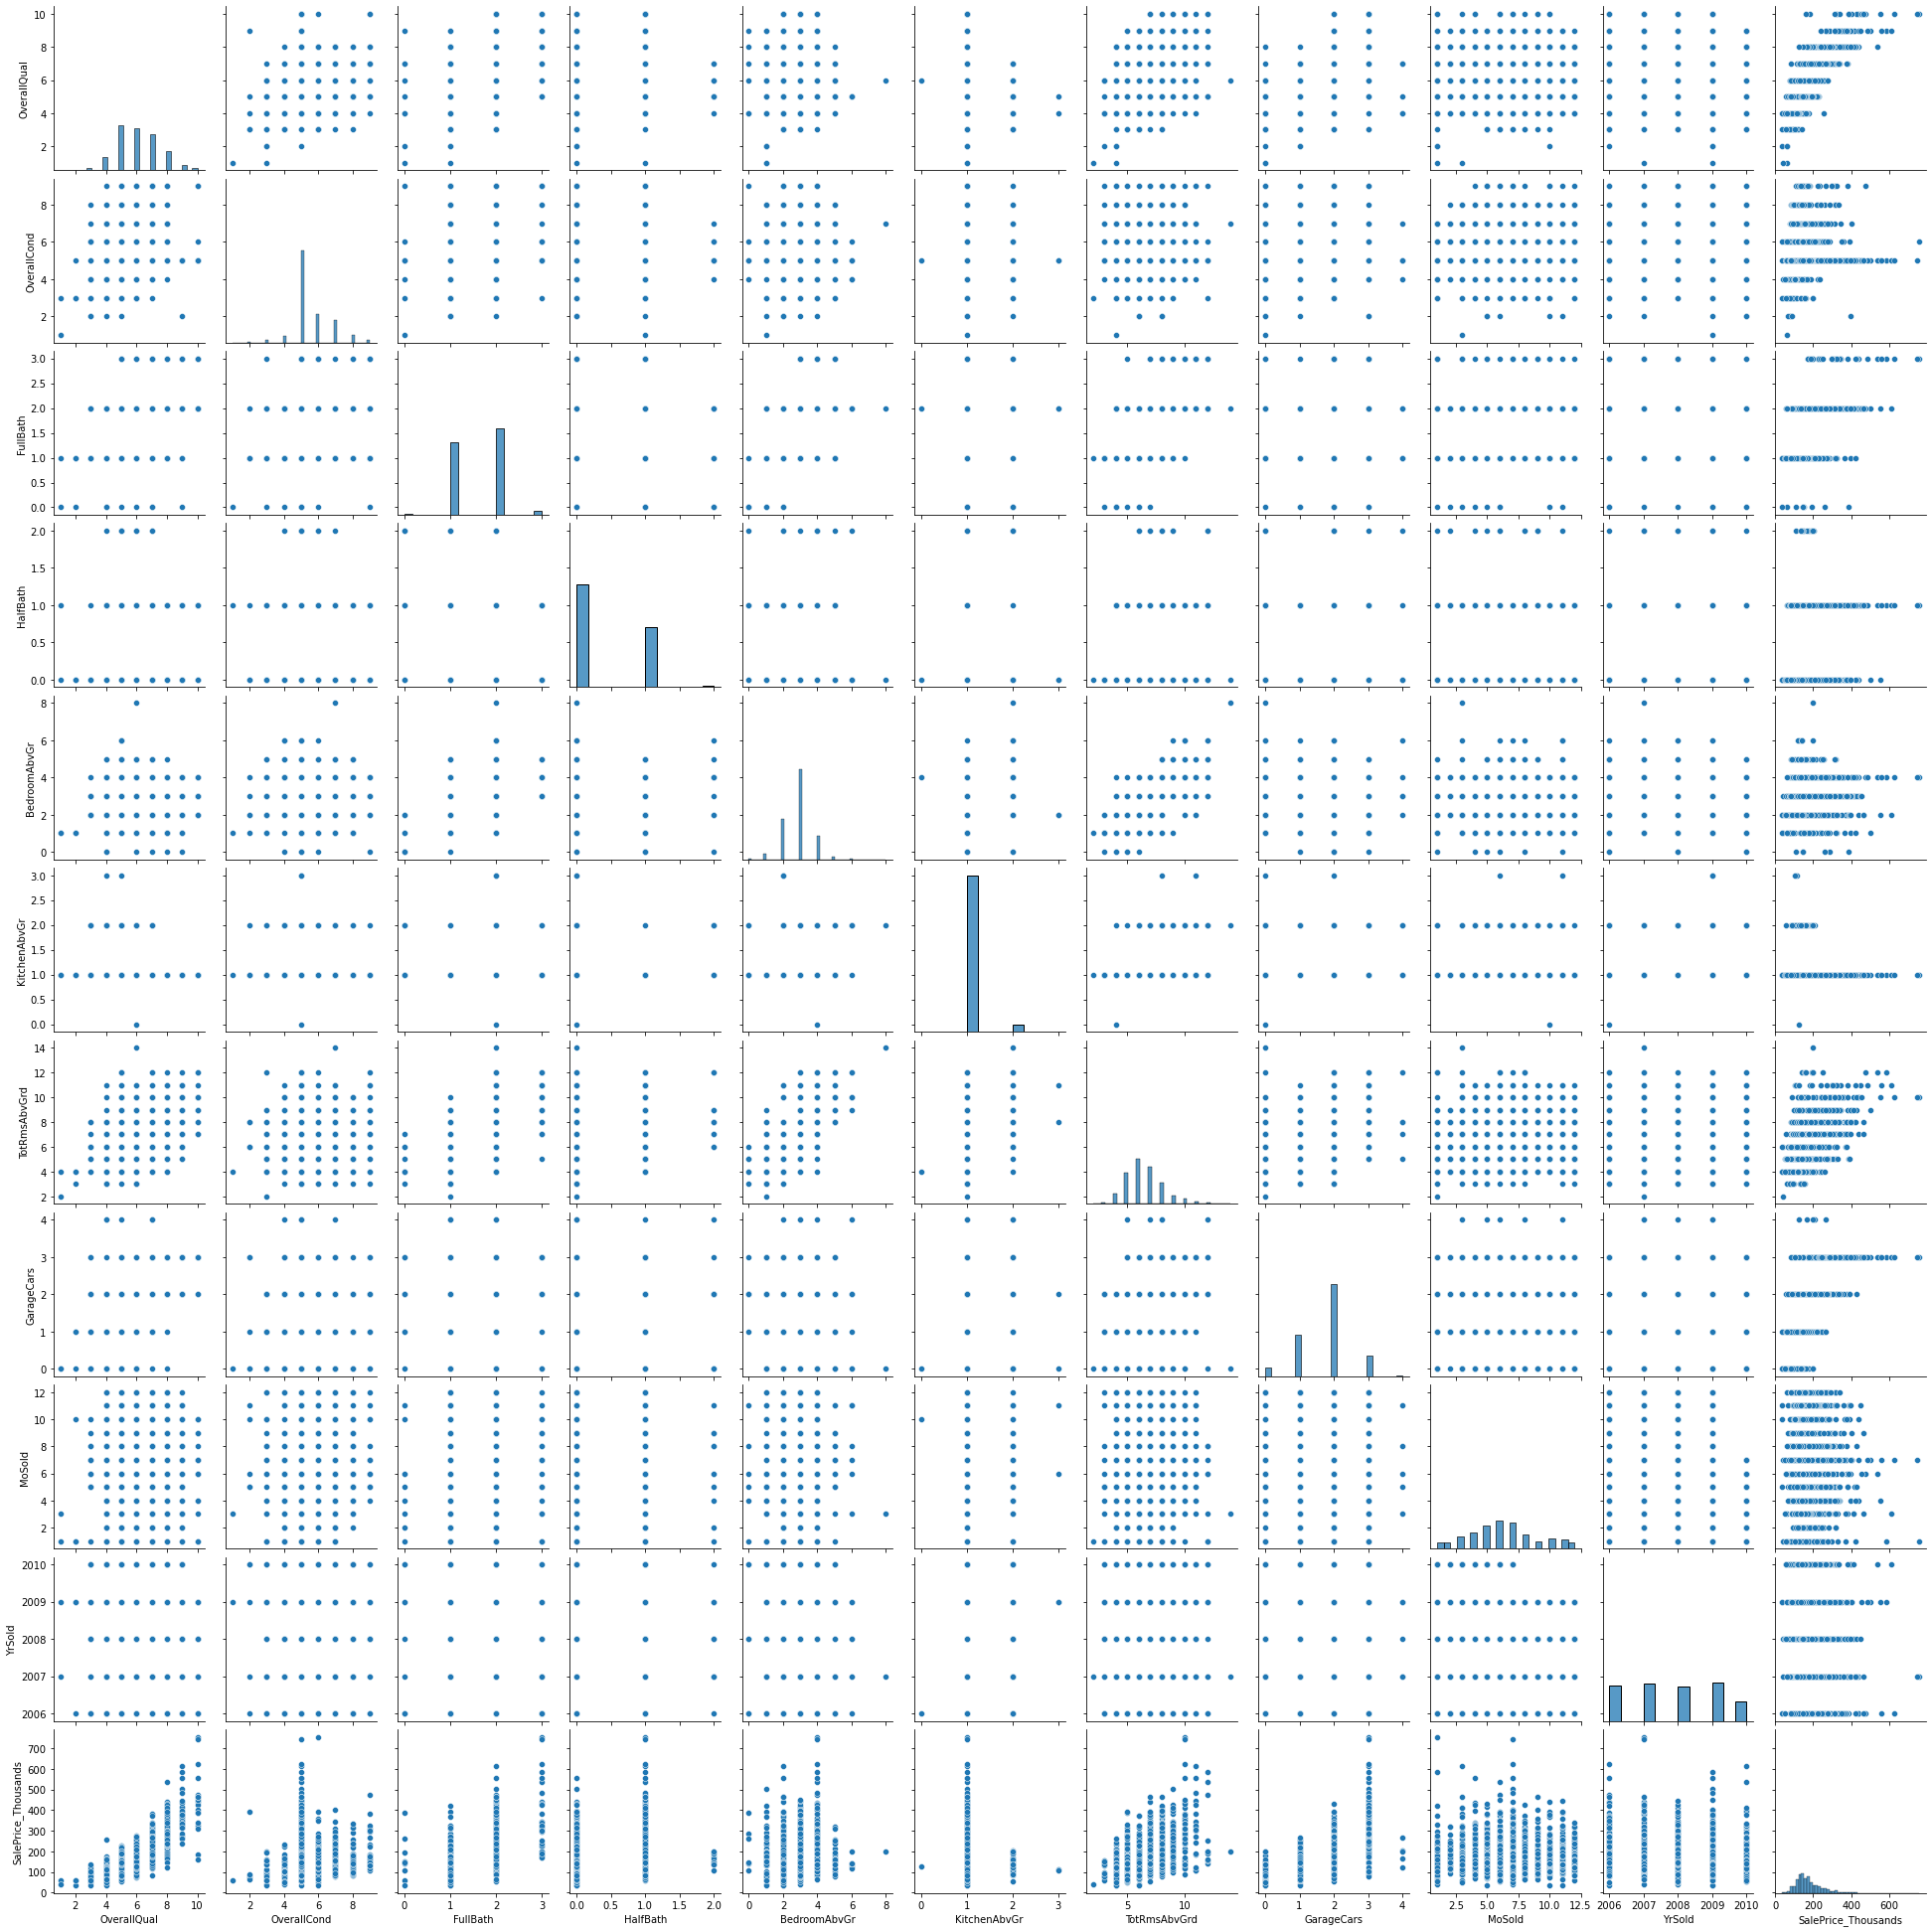

In [214]:
sns.pairplot(housing_df[num_var_list])
plt.show()

### Observations: 

#### LotArea: 
There seems to be a very small amount of data present for lot areas greater than 100,000. We will remove these outliers.
#### LotFrontage: 
Drop rows having lot frontage gearter than 200.
#### TotalBsmtSF: 
Drop rows having lot frontage gearter than 3200 sq feet.

#### YearBuilt: 
There seems to be small amout of data present for houses built before 1900. As these are very old houses, either they would be in diapidated condition or would have been remodeled. We will exclude them from this model and drop the data before 1900.

#### LowQualFinSF: 
This features has 98% values as zero. It will be dropped.

#### BsmtFullBath: 
Replace 3 with 2 as there seem to be just one house having 3 basement full baths.
#### BsmtHalfBath: 
Replace 2 with 1 as there seem to be just two houses having 2 basement half baths.
#### GarageCars: 
Repalce 4 with 3 car parking.
#### BedroomAbvGr: 
Replace 8 with 6.
#### KitchenAbvGr:
Replace 3 with 2.

These data replacements / outlier treatment will help generalize the model.

In [215]:
housing_df.drop(housing_df[(housing_df.LotArea > 100000) | (housing_df.YearBuilt < 1900) | (housing_df.LotFrontage > 200) | (housing_df.TotalBsmtSF > 3200) ].index, inplace = True)

In [216]:
housing_df.drop(['LowQualFinSF'], axis = 1, inplace = True)

In [217]:
housing_df.loc[housing_df['BsmtFullBath'] == 3, 'BsmtFullBath'] = 2
housing_df.loc[housing_df['BsmtHalfBath'] == 2, 'BsmtHalfBath'] = 1
housing_df.loc[housing_df['GarageCars'] == 4, 'GarageCars'] = 3
housing_df.loc[housing_df['BedroomAbvGr'] == 8, 'BedroomAbvGr'] = 6
housing_df.loc[housing_df['KitchenAbvGr'] == 3, 'KitchenAbvGr'] = 2


In [218]:
housing_df.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,MoSold,YrSold,SalePrice_Thousands
count,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000
mean,56.731572,69.595967,10032.798331,6.091099,5.561892,1972.146732,1052.210709,340.937413,0.424896,0.056328,1.561892,0.384562,2.859527,1.043811,6.488178,1.762865,6.306676,2007.811544,180.280946
std,42.259911,20.027195,5461.025128,1.374048,1.097854,29.071817,414.989161,431.952430,0.512467,0.230635,0.549556,0.503528,0.806905,0.208116,1.602299,0.737756,2.698714,1.330528,78.955051
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2006.000000,34.000000
25%,20.000000,60.000000,7508.750000,5.000000,5.000000,1954.000000,796.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,1.000000,5.000000,2007.000000,130.000000
50%,50.000000,70.000000,9451.000000,6.000000,5.000000,1973.000000,990.500000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,2008.000000,163.000000
75%,70.000000,78.750000,11522.500000,7.000000,6.000000,2001.000000,1296.750000,728.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,2.000000,8.000000,2009.000000,213.000000
max,190.000000,182.000000,70761.000000,10.000000,9.000000,2010.000000,3200.000000,2065.000000,2.000000,1.000000,3.000000,2.000000,6.000000,2.000000,14.000000,3.000000,12.000000,2010.000000,755.000000


In [219]:
housing_df.shape

(1438, 44)

#### Visualize the categorical variables
We will draw box plots.

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice_Thousands'>

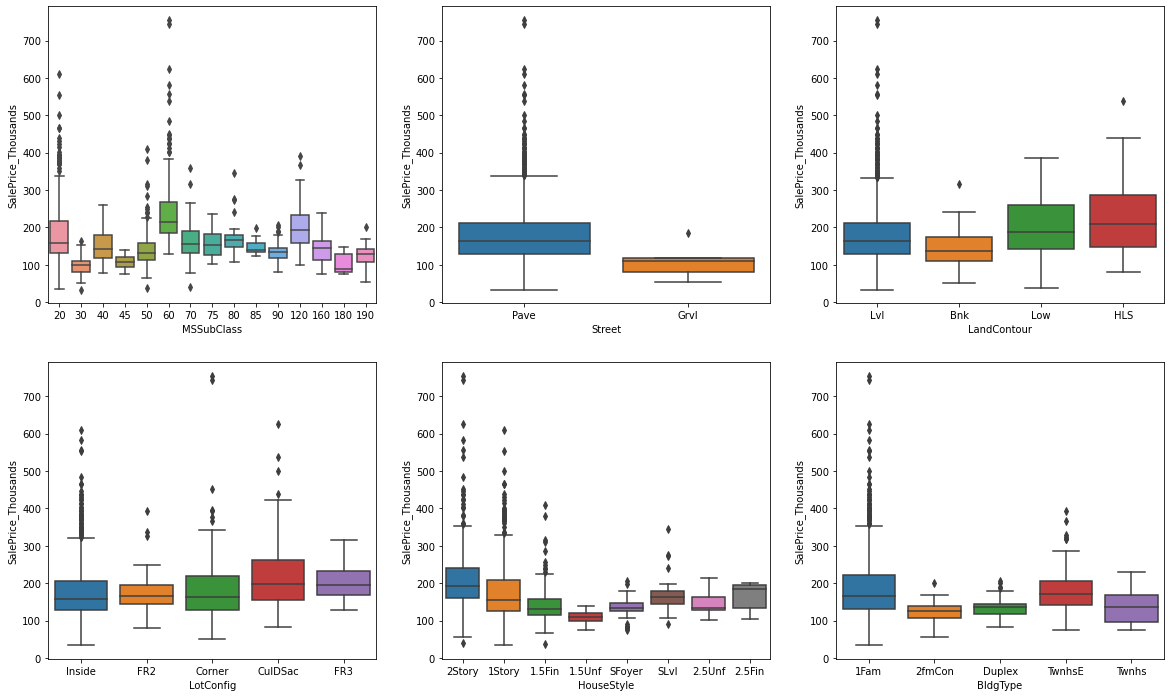

In [220]:
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'Street', y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'LandContour' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'LotConfig' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'HouseStyle' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'BldgType' , y = 'SalePrice_Thousands', data = housing_df)



#### Observations:

MSSubClass: SubClass 60 and 120 have higher prices than the other SubClass.

Street: Paved street houses have higher prices than the other types.

LandContour: HLS contours have prices higher than the others.

LotConfig: CulDSac have highest prices.

BldgType: Single Family and TownhousesE have higher prices than the others.

HouseStyle: Double story houses have better prices than the other types.

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice_Thousands'>

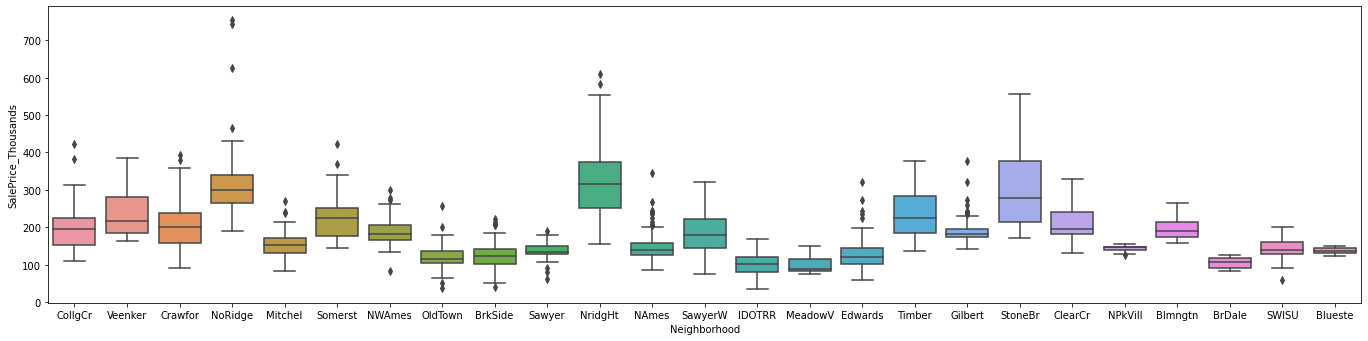

In [221]:
plt.figure(figsize = (80,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Neighborhood' , y = 'SalePrice_Thousands', data = housing_df)

#### Neighbourhood: 
NridgHt and StoneBr seem to be preferred neighbourhoods.

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice_Thousands'>

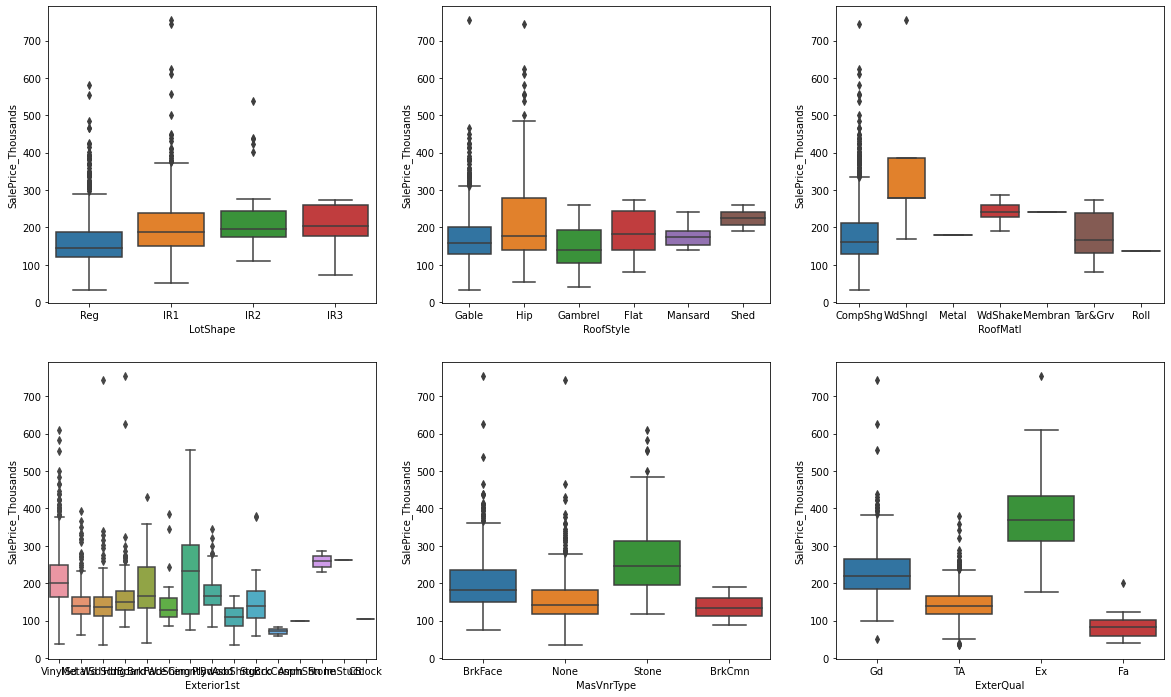

In [222]:
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'LotShape' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'RoofStyle' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'RoofMatl' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'Exterior1st' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'MasVnrType' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'ExterQual' , y = 'SalePrice_Thousands', data = housing_df)


<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice_Thousands'>

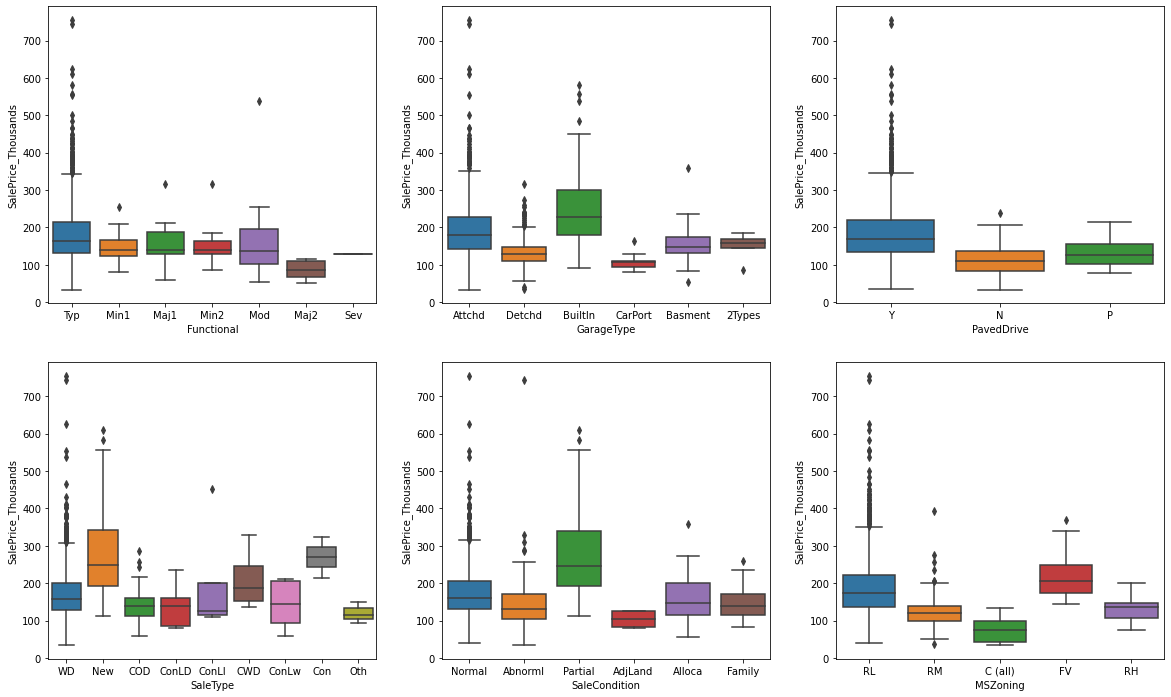

In [223]:
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Functional' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'GarageType' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'PavedDrive' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'SaleType' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'SaleCondition' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'MSZoning' , y = 'SalePrice_Thousands', data = housing_df)


<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice_Thousands'>

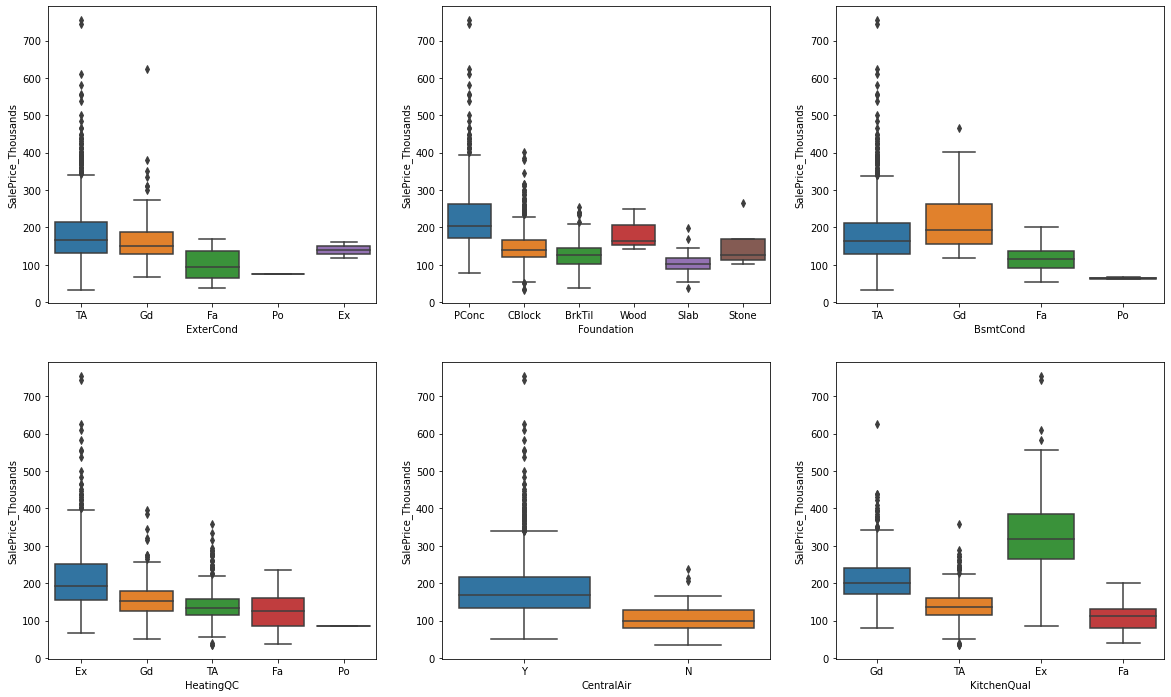

In [224]:
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'ExterCond' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'Foundation' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'BsmtCond' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'HeatingQC' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'CentralAir' , y = 'SalePrice_Thousands', data = housing_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'KitchenQual' , y = 'SalePrice_Thousands', data = housing_df)

#### Observations:

Observation on the features that seem to have considerable effects on the price:

ExterCond: It does not seem that exterior condition on 'Ex' push prices higher than 'TA'.

Foundation: PConc-Poured Contrete seems to be most prefered foundation type.

BsmtCond: Good Basement condition impacts sales price significantly.

HeatingQC: Excellent Heating Quality demands higher price.

CentralAir: presence of central air conditioner commands better sale price.

KitchenQual: Kitchen Quality impacts the prices quite significantly.


## Step 3: Data Preparation

### Dummy Variables

Now we will create dummy variables for categorical features <br>


While performing the analysis, we will drop the first column to avoid having multi-collinearity problem. First column can be easily reproduced with the help of two other retained levels.

In [225]:
def get_dummy(df, col):
    dummy_df = pd.get_dummies(df[col], prefix = col, drop_first = True)
    df.drop(col, axis = 1, inplace = True)
    return pd.concat([df, dummy_df], axis = 1)

col_list = ['MSSubClass','MSZoning', 'Street', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'Neighborhood', 'LotShape', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']
for col in col_list:
    housing_df = get_dummy(housing_df, col)

In [226]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1438 entries, 0 to 1459
Columns: 164 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(1), int64(17), uint8(146)
memory usage: 450.8 KB


# Step 4: Splitting the Data into Training and Testing Sets

In [227]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing_df, train_size = 0.8, test_size = 0.2, random_state = 100)

### Rescaling the features
We will be using Min-Max scaling

In [228]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [229]:
# Apply scaler to all the variables except the ones that have Yes/No (0/1) and 'dummy' variable

num_vars_scale = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','TotalBsmtSF','2ndFlrSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','MoSold','YrSold']

df_train[num_vars_scale] = scaler.fit_transform(df_train[num_vars_scale])

df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
749,0.189542,0.102288,0.333333,0.142857,0.409091,0.000000,0.213559,0.0,0.0,0.666667,...,0,0,0,0,1,0,0,0,1,0
719,0.313725,0.124098,0.444444,0.571429,0.627273,0.303438,0.000000,0.0,0.0,0.333333,...,0,0,0,0,1,0,0,0,1,0
1023,0.143791,0.027094,0.666667,0.428571,0.954545,0.420625,0.000000,0.0,0.0,0.666667,...,0,0,0,0,1,0,0,0,1,0
379,0.254902,0.098228,0.555556,0.428571,0.909091,0.306875,0.384019,0.0,0.0,0.666667,...,0,0,0,0,1,0,0,0,1,0
1266,0.254902,0.126978,0.666667,0.285714,0.090909,0.289062,0.447942,0.0,0.0,0.333333,...,0,0,0,0,1,0,0,0,1,0


In [230]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,...,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000
mean,0.316323,0.125706,0.563092,0.512298,0.651668,0.325638,0.166264,0.212174,0.054783,0.519420,...,0.001739,0.004348,0.086087,0.000870,0.871304,0.002609,0.008696,0.013043,0.820870,0.087826
std,0.128617,0.080384,0.151023,0.159203,0.266593,0.131357,0.208199,0.255027,0.227654,0.183340,...,0.041685,0.065823,0.280614,0.029488,0.335008,0.051031,0.092885,0.113510,0.383628,0.283165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254902,0.087833,0.444444,0.428571,0.490909,0.247813,0.000000,0.000000,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.320261,0.117692,0.555556,0.428571,0.663636,0.305781,0.000000,0.000000,0.000000,0.666667,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.372549,0.148227,0.666667,0.571429,0.909091,0.395859,0.351816,0.500000,0.000000,0.666667,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [231]:
y_train = df_train.pop('SalePrice_Thousands')
X_train = df_train


# Step 5: Building a linear model

In [232]:
import statsmodels.api as sm

# add a constant so model does not fit a line passsing through the origin. 

X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
749,1.0,0.189542,0.102288,0.333333,0.142857,0.409091,0.000000,0.213559,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
719,1.0,0.313725,0.124098,0.444444,0.571429,0.627273,0.303438,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1023,1.0,0.143791,0.027094,0.666667,0.428571,0.954545,0.420625,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
379,1.0,0.254902,0.098228,0.555556,0.428571,0.909091,0.306875,0.384019,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1266,1.0,0.254902,0.126978,0.666667,0.285714,0.090909,0.289062,0.447942,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [233]:
# create a first fitted model
lr = sm.OLS(y_train, X_train_sm).fit()

In [234]:
# Check the parameters

lr.params

const                   -27.775396
LotFrontage              14.844165
LotArea                  46.000542
OverallQual              67.081852
OverallCond              43.661546
                           ...    
SaleCondition_AdjLand    21.895052
SaleCondition_Alloca     29.984959
SaleCondition_Family     -1.121797
SaleCondition_Normal      6.579741
SaleCondition_Partial   -43.447187
Length: 164, dtype: float64

In [235]:
# Print a summary of linear regression model obtained

print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     SalePrice_Thousands   R-squared:                       0.897
Model:                             OLS   Adj. R-squared:                  0.881
Method:                  Least Squares   F-statistic:                     55.22
Date:                 Sun, 14 Aug 2022   Prob (F-statistic):               0.00
Time:                         04:32:35   Log-Likelihood:                -5346.4
No. Observations:                 1150   AIC:                         1.101e+04
Df Residuals:                      992   BIC:                         1.181e+04
Df Model:                          157                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

#### Observation:
#R-Squared is telling us, only 89% of the variance in SalePrice is explained by this model.<br>
#Prob(F-stat) is low, that means fit is not by chance. <br>
#P-value of a few variables is higher than 0.05, meaning those variables should be further analyzed. <br>

# Residual Analysis of the train data
Validate if error terms are normally distributed. Plotting the histogram of the error terms:

In [238]:
y_train_pred = lr.predict(X_train_sm)

In [239]:
# Import the required libraries for plots.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

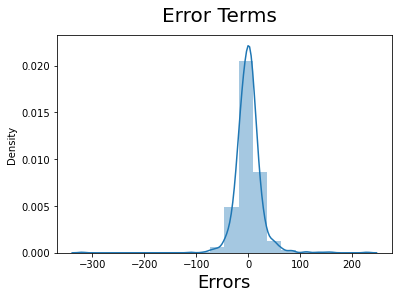

In [240]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)       # Plot heading 
plt.xlabel('Errors', fontsize = 18)              # X-label

#### Observations:
Error terms are nominally distributed. Hence, assumption of linear regression is true.

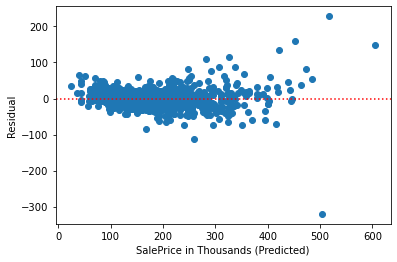

In [247]:
data = pd.DataFrame()
data['res'] = y_train - y_train_pred
plt.scatter(y_train_pred, data['res'])
plt.axhline(y = 0, color = 'r', linestyle=':')
plt.xlabel("SalePrice in Thousands (Predicted)")
plt.ylabel('Residual')
plt.show()


Residuals are prefectly aligned around the axis.

#### Calculate Matric

In [259]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr_train_r2 = r2_score(y_train, y_train_pred)
print(lr_train_r2)
lr_train_rss = np.sum(np.square(y_train - y_train_pred))
print(lr_train_rss)
lr_train_mse = mean_squared_error(y_train, y_train_pred)
print(lr_train_mse)
lr_train_rmse = lr_train_mse**0.5
print(lr_train_rmse)

0.8973309365144452
735133.0304160079
639.2461134052243
25.283316898801555


# Making the Predictions on test data

In [241]:
# Applying scaling on the test set

df_test[num_vars_scale] = scaler.transform(df_test[num_vars_scale])

y_test = df_test.pop('SalePrice_Thousands')
X_test = df_test

In [242]:
# use our model to make predictions

X_test_new = sm.add_constant(X_test)

# Making prediction

y_pred = lr.predict(X_test_new)


# Model Evaluation

Text(0, 0.5, 'y_pred')

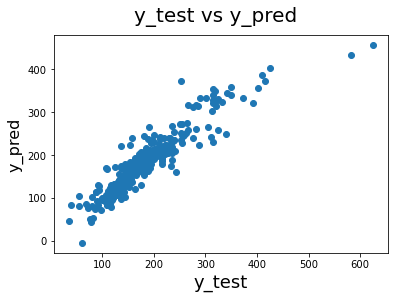

In [243]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Wow! Above plot looks really good.

### Calculate the Adjusted R2 and Other Matrices

In [262]:
from sklearn.metrics import r2_score

lr_test_r2 = r2_score(y_test, y_pred)
lr_test_r2

0.8572353977219694

In [252]:
no_of_var = df_test.shape[1]
no_of_rcd = df_test.shape[0]

lr_adj_R2 = 1 - ((1-r_squared)*(no_of_rcd-1))/(no_of_rcd-no_of_var-1)
lr_adj_R2

0.6695690253726228

In [260]:
from sklearn.metrics import mean_squared_error

lr_test_rss = np.sum(np.square(y_test - y_pred))
print(lr_test_rss)
lr_test_mse = mean_squared_error(y_test, y_pred)
print(lr_test_mse)
lr_test_rmse = lr_test_mse**0.5
print(lr_test_rmse)

255886.95003252925
888.4963542796154
29.807655967546584


#### Observation - R-squared and Adjusted R-squared values:

R2 value on the test data comes out to be 0.85. <br>
R2 value of the model on the training data is 0.89. 

Adjusted R2 value on the test data comes out to be 0.66. <br>
Adjusted R2 value of the model on the training data is 0.88.

rmse value indicates that house price predicted could be of by $29807.

This model is doing pretty good but its not the perfect model. Some of the ideas are:<br>
-May be trying different percentages of training and test data might close the gap between Adjusted R2 values.<br>
-Train the model iteratively by selecting different sets of data for training and testing. <br>
-Reduce the number of variables which have high p-value.

## Matrix Creation

In [266]:
matrix_data = pd.DataFrame()
matrix_data['Matric'] = ['R2 - Train', 'R2 - Test', 'RSS - Train', 'RSS - Test', 'MSE - Train', 'MSE - Test', 'RMSE - Train', 'RMSE - Test']

matrix_data['Linear Regression'] = [lr_train_r2, lr_test_r2, lr_train_rss, lr_test_rss, lr_train_mse, lr_test_mse, lr_train_rmse, lr_test_rmse]

matrix_data.head(8)

,Matric,Linear Regression
0,R2 - Train,0.897331
1,R2 - Test,0.857235
2,RSS - Train,735133.030416
3,RSS - Test,255886.950033
4,MSE - Train,639.246113
5,MSE - Test,888.496354
6,RMSE - Train,25.283317
7,RMSE - Test,29.807656


# Ridge Regression

In [269]:
# list of alphas to consider
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [276]:
# Printing the best hyperparameter alpha
ridge_aplha = {}
ridge_aplha = model_cv.best_params_
print(ridge_aplha['alpha'])

3.0


In [277]:
#Fitting Ridge model for best alpha and printing coefficients which have been penalised
ridge = Ridge(alpha=ridge_aplha['alpha'])

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.81608409e+01  3.82024239e+01  7.16266554e+01  3.38264126e+01
  1.84860700e+01  1.02776396e+02  7.13948175e+01  1.77521271e+01
  5.68954030e+00  3.32855696e+01  1.25834265e+01 -2.05641498e+01
 -2.26309100e+01  5.48477092e+01  3.52712178e+01 -2.69122416e+00
 -2.98628045e+00 -6.80642998e+00  6.61262091e+00  1.15113732e+00
  2.41439680e+00  4.68037364e+00  2.00041657e+00  3.03088285e+00
  5.91345240e+00 -4.40994693e+00 -5.27984920e+00 -1.49556382e+01
 -6.12831334e+00  6.77206796e-01 -4.48335064e+00  1.07876191e+01
  6.97556549e+00  6.82669456e+00  5.99901206e+00  6.07568008e+00
  1.98812570e+01  6.55854706e+00  7.28542237e+00  7.87109583e+00
 -1.20669664e+01 -1.51148758e+01 -1.12428954e+00 -2.28263040e+00
 -5.27984920e+00 -1.12738468e+01 -8.44402602e+00  3.67111985e+00
  1.06576923e+01 -3.94330367e+00 -4.47504643e+00 -8.43849034e+00
  4.71908658e+00  4.23170512e+00 -2.80398120e+00  1.97339683e+00
  1.96043484e+00 -4.99357602e+00 -8.02983143e+00  1.82557136e+01
 -1.81372699e+01 -1.54781

In [280]:
# Lets calculate some metrics such as R2 score, RSS, MSE and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print(rss_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)

rmse_train_lr = mse_train_lr**0.5 
print(rmse_train_lr)

rmse_test_lr = mse_test_lr**0.5
print(rmse_test_lr)

0.8893438506855434
0.8662011506468362
792322.3181162833
239817.00598420383
688.975928796768
832.6979374451522
26.248350972904337
28.856505981236747


In [281]:
matrix_data['Ridge Regression'] = [r2_train_lr, r2_test_lr, rss_train_lr, rss_test_lr, mse_train_lr, mse_test_lr, rmse_train_lr,rmse_test_lr ]

matrix_data.head(8)


,Matric,Linear Regression,Ridge Regression
0,R2 - Train,0.897331,0.889344
1,R2 - Test,0.857235,0.866201
2,RSS - Train,735133.030416,792322.318116
3,RSS - Test,255886.950033,239817.005984
4,MSE - Train,639.246113,688.975929
5,MSE - Test,888.496354,832.697937
6,RMSE - Train,25.283317,26.248351
7,RMSE - Test,29.807656,28.856506


In [298]:
#Storing the coefficients so it can help me explain the model. 

ridge_model_coef = pd.DataFrame()
ridge_model_coef['features'] = X_train.columns
ridge_model_coef['best_lambda'] = ridge.coef_


ridge_model_coef.head(20)

,features,best_lambda
0,LotFrontage,18.160841
1,LotArea,38.202424
2,OverallQual,71.626655
3,OverallCond,33.826413
4,YearBuilt,18.486070
5,TotalBsmtSF,102.776396
6,2ndFlrSF,71.394817
7,BsmtFullBath,17.752127
8,BsmtHalfBath,5.689540
9,FullBath,33.285570


# Ridge Regression at 2 * Best Lambda

In [300]:
#Fitting Ridge model for best alpha and printing coefficients which have been penalised
ridge = Ridge(alpha= 2 * ridge_aplha['alpha'])

ridge.fit(X_train, y_train)

# Lets calculate some metrics such as R2 score, RSS, MSE and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)

r2_test_lr = r2_score(y_test, y_pred_test)

rss_train_lr = np.sum(np.square(y_train - y_pred_train))

rss_test_lr = np.sum(np.square(y_test - y_pred_test))

mse_train_lr = mean_squared_error(y_train, y_pred_train)

mse_test_lr = mean_squared_error(y_test, y_pred_test)

rmse_train_lr = mse_train_lr**0.5 

rmse_test_lr = mse_test_lr**0.5

matrix_data['Ridge 2X_Best Lambda'] = [r2_train_lr, r2_test_lr, rss_train_lr, rss_test_lr, mse_train_lr, mse_test_lr, rmse_train_lr,rmse_test_lr ]

#Storing the coefficients so it can help me explain the model. 

ridge_model_coef['2X_best_lambda'] = ridge.coef_


ridge_model_coef.head(20)



,features,best_lambda,2X_best_lambda
0,LotFrontage,18.160841,18.204408
1,LotArea,38.202424,32.037919
2,OverallQual,71.626655,67.301459
3,OverallCond,33.826413,28.357008
4,YearBuilt,18.486070,16.943114
5,TotalBsmtSF,102.776396,83.925775
6,2ndFlrSF,71.394817,53.683919
7,BsmtFullBath,17.752127,18.067948
8,BsmtHalfBath,5.689540,5.345174
9,FullBath,33.285570,33.495591


In [301]:
matrix_data.head(8)

,Matric,Linear Regression,Ridge Regression,Ridge 2X_Best Lambda
0,R2 - Train,0.897331,0.889344,0.881684
1,R2 - Test,0.857235,0.866201,0.861982
2,RSS - Train,735133.030416,792322.318116,847168.469496
3,RSS - Test,255886.950033,239817.005984,247378.750369
4,MSE - Train,639.246113,688.975929,736.668234
5,MSE - Test,888.496354,832.697937,858.953994
6,RMSE - Train,25.283317,26.248351,27.141633
7,RMSE - Test,29.807656,28.856506,29.307917


# Lasso Regression

In [302]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [307]:
# Printing the best hyperparameter alpha
lasso_alpha = {}
lasso_alpha = model_cv.best_params_
print(lasso_alpha['alpha'])


0.1


In [308]:
#Fitting Lasso model for best alpha and printing coefficients which have been penalised

lasso = Lasso(alpha=lasso_alpha['alpha'])
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.1)

In [309]:
lasso.coef_

array([ 9.24574286e+00,  3.99197097e+01,  8.58348073e+01,  3.83855731e+01,
        1.84609500e+01,  1.40651068e+02,  8.91892217e+01,  1.48341905e+01,
        2.42843181e+00,  2.01009751e+01,  6.91310124e+00, -2.29481406e+01,
       -2.96640640e+01,  5.07082810e+01,  3.44412908e+01, -9.37341314e-01,
       -1.28964914e+00, -2.35606665e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.49849675e-01, -0.00000000e+00, -0.00000000e+00,
        4.65045849e+00, -0.00000000e+00, -9.12196054e-01, -1.86107896e+01,
       -1.14072523e+01,  0.00000000e+00, -2.33698230e-01,  6.02450152e+00,
        0.00000000e+00,  1.67366156e+00, -8.66069478e-01,  0.00000000e+00,
        1.32756878e+01,  0.00000000e+00,  2.09187573e+00,  8.52401577e+00,
       -6.67517892e+00, -0.00000000e+00, -1.23063035e-01, -0.00000000e+00,
       -1.12595131e+00, -1.87303359e+00, -0.00000000e+00,  0.00000000e+00,
        8.11998805e+00, -0.00000000e+00, -0.00000000e+00, -6.89689359e+00,
       -0.00000000e+00,  

In [310]:
# Lets calculate some metrics such as R2 score, RSS, MSE and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print(rss_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)

rmse_train_lr = mse_train_lr**0.5 
print(rmse_train_lr)

rmse_test_lr = mse_test_lr**0.5
print(rmse_test_lr)

0.8854384486432344
0.8712669382595566
820285.8539749642
230737.24166554486
713.2920469347515
801.1709780053641
26.70752790759099
28.304963840382555


In [311]:
matrix_data['Lasso Regression'] = [r2_train_lr, r2_test_lr, rss_train_lr, rss_test_lr, mse_train_lr, mse_test_lr, rmse_train_lr,rmse_test_lr ]

matrix_data.head(8)

,Matric,Linear Regression,Ridge Regression,Ridge 2X_Best Lambda,Lasso Regression
0,R2 - Train,0.897331,0.889344,0.881684,0.885438
1,R2 - Test,0.857235,0.866201,0.861982,0.871267
2,RSS - Train,735133.030416,792322.318116,847168.469496,820285.853975
3,RSS - Test,255886.950033,239817.005984,247378.750369,230737.241666
4,MSE - Train,639.246113,688.975929,736.668234,713.292047
5,MSE - Test,888.496354,832.697937,858.953994,801.170978
6,RMSE - Train,25.283317,26.248351,27.141633,26.707528
7,RMSE - Test,29.807656,28.856506,29.307917,28.304964


In [312]:
#Storing the coefficients so it can help me explain the model. 

model_coef = ridge_model_coef

model_coef['lasso_best_lambda'] = lasso.coef_

model_coef.head(20)

,features,best_lambda,2X_best_lambda,lasso_best_lambda
0,LotFrontage,18.160841,18.204408,9.245743
1,LotArea,38.202424,32.037919,39.919710
2,OverallQual,71.626655,67.301459,85.834807
3,OverallCond,33.826413,28.357008,38.385573
4,YearBuilt,18.486070,16.943114,18.460950
5,TotalBsmtSF,102.776396,83.925775,140.651068
6,2ndFlrSF,71.394817,53.683919,89.189222
7,BsmtFullBath,17.752127,18.067948,14.834191
8,BsmtHalfBath,5.689540,5.345174,2.428432
9,FullBath,33.285570,33.495591,20.100975


# Lasso Regression at 2 * Best Lambda

In [313]:
#Fitting Ridge model for best alpha and printing coefficients which have been penalised

lasso = Lasso(alpha= 2 * lasso_alpha['alpha'])
        
lasso.fit(X_train, y_train) 


# Lets calculate some metrics such as R2 score, RSS, MSE and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)

r2_test_lr = r2_score(y_test, y_pred_test)

rss_train_lr = np.sum(np.square(y_train - y_pred_train))

rss_test_lr = np.sum(np.square(y_test - y_pred_test))

mse_train_lr = mean_squared_error(y_train, y_pred_train)

mse_test_lr = mean_squared_error(y_test, y_pred_test)

rmse_train_lr = mse_train_lr**0.5 

rmse_test_lr = mse_test_lr**0.5

matrix_data['Lasso 2X Best Lambda'] = [r2_train_lr, r2_test_lr, rss_train_lr, rss_test_lr, mse_train_lr, mse_test_lr, rmse_train_lr,rmse_test_lr ]

matrix_data.head(8)



,Matric,Linear Regression,Ridge Regression,Ridge 2X_Best Lambda,Lasso Regression,Lasso 2X Best Lambda
0,R2 - Train,0.897331,0.889344,0.881684,0.885438,0.873265
1,R2 - Test,0.857235,0.866201,0.861982,0.871267,0.861517
2,RSS - Train,735133.030416,792322.318116,847168.469496,820285.853975,907447.080367
3,RSS - Test,255886.950033,239817.005984,247378.750369,230737.241666,248212.067351
4,MSE - Train,639.246113,688.975929,736.668234,713.292047,789.084418
5,MSE - Test,888.496354,832.697937,858.953994,801.170978,861.847456
6,RMSE - Train,25.283317,26.248351,27.141633,26.707528,28.090646
7,RMSE - Test,29.807656,28.856506,29.307917,28.304964,29.357239


In [314]:
model_coef['2X_lasso_best_lambda'] = lasso.coef_

model_coef.head(20)

,features,best_lambda,2X_best_lambda,lasso_best_lambda,2X_lasso_best_lambda
0,LotFrontage,18.160841,18.204408,9.245743,3.453106
1,LotArea,38.202424,32.037919,39.919710,36.744768
2,OverallQual,71.626655,67.301459,85.834807,100.442730
3,OverallCond,33.826413,28.357008,38.385573,33.549460
4,YearBuilt,18.486070,16.943114,18.460950,14.973632
5,TotalBsmtSF,102.776396,83.925775,140.651068,135.379798
6,2ndFlrSF,71.394817,53.683919,89.189222,68.375143
7,BsmtFullBath,17.752127,18.067948,14.834191,13.743006
8,BsmtHalfBath,5.689540,5.345174,2.428432,0.000000
9,FullBath,33.285570,33.495591,20.100975,14.060592


In [424]:
model_coef1 = model_coef
model_lr = pd.DataFrame()
model_lr = lr.params
model_lr.shape

(164,)

In [425]:
model_lr = model_lr.drop(['const'])
rg_metric = model_lr.reset_index()
rg_metric.head()

,index,0
0,LotFrontage,14.844165
1,LotArea,46.000542
2,OverallQual,67.081852
3,OverallCond,43.661546
4,YearBuilt,19.766731


In [426]:
model_coef1 = pd.concat([model_coef1, rg_metric[0]], axis = 1)

In [438]:
model_coef1['LReg'] = model_coef1[0]

In [441]:
model_coef1.drop([0], axis = 1, inplace = True)

In [442]:
model_coef1.sort_values(by=['LReg'], ascending = False).head(10)

,features,best_lambda,2X_best_lambda,lasso_best_lambda,2X_lasso_best_lambda,LReg
5,TotalBsmtSF,102.776396,83.925775,140.651068,135.379798,154.352195
6,2ndFlrSF,71.394817,53.683919,89.189222,68.375143,126.820156
91,RoofMatl_WdShngl,53.177887,41.734703,57.825502,39.716538,72.942712
150,SaleType_CWD,26.263903,16.672527,6.171112,0.000000,71.447373
2,OverallQual,71.626655,67.301459,85.834807,100.442730,67.081852
155,SaleType_New,19.288194,14.658409,17.594378,18.916564,65.402060
13,TotRmsAbvGrd,54.847709,50.846529,50.708281,41.522277,60.877966
75,Neighborhood_StoneBr,44.275746,38.923554,45.950143,38.104676,53.445941
68,Neighborhood_NoRidge,44.663785,42.441120,48.436837,45.037787,46.114251
1,LotArea,38.202424,32.037919,39.919710,36.744768,46.000542


In [443]:
model_coef1.sort_values(by=['best_lambda'], ascending = False).head(10)

,features,best_lambda,2X_best_lambda,lasso_best_lambda,2X_lasso_best_lambda,LReg
5,TotalBsmtSF,102.776396,83.925775,140.651068,135.379798,154.352195
2,OverallQual,71.626655,67.301459,85.834807,100.442730,67.081852
6,2ndFlrSF,71.394817,53.683919,89.189222,68.375143,126.820156
13,TotRmsAbvGrd,54.847709,50.846529,50.708281,41.522277,60.877966
91,RoofMatl_WdShngl,53.177887,41.734703,57.825502,39.716538,72.942712
68,Neighborhood_NoRidge,44.663785,42.441120,48.436837,45.037787,46.114251
75,Neighborhood_StoneBr,44.275746,38.923554,45.950143,38.104676,53.445941
1,LotArea,38.202424,32.037919,39.919710,36.744768,46.000542
14,GarageCars,35.271218,37.371459,34.441291,38.566306,31.949690
3,OverallCond,33.826413,28.357008,38.385573,33.549460,43.661546


In [479]:
model_coef1.sort_values(by=['lasso_best_lambda'], ascending = False).head(10)

,features,best_lambda,2X_best_lambda,lasso_best_lambda,2X_lasso_best_lambda,LReg
5,TotalBsmtSF,102.776396,83.925775,140.651068,135.379798,154.352195
6,2ndFlrSF,71.394817,53.683919,89.189222,68.375143,126.820156
2,OverallQual,71.626655,67.301459,85.834807,100.442730,67.081852
91,RoofMatl_WdShngl,53.177887,41.734703,57.825502,39.716538,72.942712
13,TotRmsAbvGrd,54.847709,50.846529,50.708281,41.522277,60.877966
68,Neighborhood_NoRidge,44.663785,42.441120,48.436837,45.037787,46.114251
75,Neighborhood_StoneBr,44.275746,38.923554,45.950143,38.104676,53.445941
1,LotArea,38.202424,32.037919,39.919710,36.744768,46.000542
3,OverallCond,33.826413,28.357008,38.385573,33.549460,43.661546
14,GarageCars,35.271218,37.371459,34.441291,38.566306,31.949690


In [445]:
model_coef1.sort_values(by=['2X_best_lambda'], ascending = False).head(10)

,features,best_lambda,2X_best_lambda,lasso_best_lambda,2X_lasso_best_lambda,LReg
5,TotalBsmtSF,102.776396,83.925775,140.651068,135.379798,154.352195
2,OverallQual,71.626655,67.301459,85.834807,100.442730,67.081852
6,2ndFlrSF,71.394817,53.683919,89.189222,68.375143,126.820156
13,TotRmsAbvGrd,54.847709,50.846529,50.708281,41.522277,60.877966
68,Neighborhood_NoRidge,44.663785,42.441120,48.436837,45.037787,46.114251
91,RoofMatl_WdShngl,53.177887,41.734703,57.825502,39.716538,72.942712
75,Neighborhood_StoneBr,44.275746,38.923554,45.950143,38.104676,53.445941
14,GarageCars,35.271218,37.371459,34.441291,38.566306,31.949690
9,FullBath,33.285570,33.495591,20.100975,14.060592,28.034232
1,LotArea,38.202424,32.037919,39.919710,36.744768,46.000542


In [446]:
model_coef1.sort_values(by=['2X_lasso_best_lambda'], ascending = False).head(10)


,features,best_lambda,2X_best_lambda,lasso_best_lambda,2X_lasso_best_lambda,LReg
5,TotalBsmtSF,102.776396,83.925775,140.651068,135.379798,154.352195
2,OverallQual,71.626655,67.301459,85.834807,100.442730,67.081852
6,2ndFlrSF,71.394817,53.683919,89.189222,68.375143,126.820156
68,Neighborhood_NoRidge,44.663785,42.441120,48.436837,45.037787,46.114251
13,TotRmsAbvGrd,54.847709,50.846529,50.708281,41.522277,60.877966
91,RoofMatl_WdShngl,53.177887,41.734703,57.825502,39.716538,72.942712
14,GarageCars,35.271218,37.371459,34.441291,38.566306,31.949690
75,Neighborhood_StoneBr,44.275746,38.923554,45.950143,38.104676,53.445941
1,LotArea,38.202424,32.037919,39.919710,36.744768,46.000542
3,OverallCond,33.826413,28.357008,38.385573,33.549460,43.661546


### Final Observation

R2 value tells us how much of the variation in the value of dependent variable is explained by the model. <br>
For all models, R2 value on the test data comes out to be approx 86%. <br>
For all models, R2 value of the model on the training data is approx 88%. <br>

RMSE tells us by how much value of target variable is likely to be off by, both of the higher as well as lower side. <br>
For all models, RMSE value on the test data comes out to be approx $29000. <br>

For all models, RMSE value of the model on the training data is approx $27000. 


# Answers to the questions asked in Part 1 of the assignment:

The company wanted to know:

#### Which variables are significant in predicting the price of a house?

Most important variables as predicted by Lasso Regression are-

TotalBsmtSF <br>
2ndFlrSF	<br>
OverallQual	<br>
RoofMatl_WdShngl <br>
TotRmsAbvGrd	<br>
Neighborhood_NoRidge <br>
Neighborhood_StoneBr <br>
LotArea <br>
OverallCond <br>
GarageCars <br>
Neighborhood_NridgHt <br>
Foundation_Slab <br>
Neighborhood_Crawfor <br>
FullBath <br>
YearBuilt <br>
SaleType_New <br>
BsmtFullBath	<br>
LandContour_HLS	 <br>
KitchenQual <br>

#### How well those variables describe the price of a house?

Features advised by the Lasso Regression model explain 87% (R2) of the variability in the price. And SalePrice advised by the model can be $28000 (RMSE) less or more than the actual value.

#### Determine the optimal value of lambda for ridge and lasso regression.

Optimal value of alpha for Ridge regression: 3 <br>
Optimal value of alpha for Lasso regression: 0.1